In [5]:
# Baseline Regression Tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

preprocessed_df = pd.read_csv("../DBtrainrides_info_message_cleanded.csv")
# Define the target and features for the regression tree
target_column = 'arrival_delay_m'  # Specify the target column

# Drop all rows with canceled == True
# Predicting arrival_delay_m
# Drop line, zip, arrival_change, departure_change, departure_delay_m, info, transformed_info_message, canceled
# Filter the DataFrame to only include the necessary columns

df_features = preprocessed_df.loc[preprocessed_df["canceled"] != True]
df_features = df_features.drop(["Unnamed: 0","line", "zip", "arrival_change", "departure_change", "departure_delay_m", "info", "transformed_info_message", "canceled"], axis=1)
df_target = preprocessed_df[target_column]
df_features

/tmp/ipykernel_57445/3668722008.py:7: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  preprocessed_df = pd.read_csv("../DBtrainrides_info_message_cleanded.csv")


,ID_Base,ID_Timestamp,stop_number,starting_station_IBNR,last_station,IBNR,long,lat,arrival_plan,departure_plan,arrival_delay_m,info_present
57,1573967790757085557,2407072312,1,8000001,stolberg(rheinl)hbf gl.44,NaN,NaN,NaN,NaN,NaN,NaN,False
58,1573967790757085557,2407072312,2,8000001,eschweiler-st.jöris,8001917.0,NaN,NaN,NaN,NaN,NaN,False
59,1573967790757085557,2407072312,3,8000001,alsdorf poststraße,8000510.0,NaN,NaN,NaN,NaN,NaN,False
60,1573967790757085557,2407072312,4,8000001,alsdorf-mariadorf,8000527.0,NaN,NaN,NaN,NaN,NaN,False
61,1573967790757085557,2407072312,5,8000001,alsdorf-kellersberg,8000521.0,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2811475,6234297817509604666,2407112012,7,8098360,stockstadt(rhein),8005740.0,NaN,NaN,NaN,NaN,NaN,False
2811476,6234297817509604666,2407112012,8,8098360,biebesheim,8000951.0,8.473978,49.781977,2024-07-11 20:45:00,2024-07-11 20:45:00,0.0,True
2811477,6234297817509604666,2407112012,9,8098360,gernsheim,8002249.0,NaN,NaN,NaN,NaN,NaN,False
2811478,6234297817509604666,2407112012,10,8098360,groß-rohrheim,NaN,NaN,NaN,NaN,NaN,NaN,False


In [6]:
df_features.groupby(["ID_Base"]).head(20)


,ID_Base,ID_Timestamp,stop_number,starting_station_IBNR,last_station,IBNR,long,lat,arrival_plan,departure_plan,arrival_delay_m,info_present
57,1573967790757085557,2407072312,1,8000001,stolberg(rheinl)hbf gl.44,NaN,NaN,NaN,NaN,NaN,NaN,False
58,1573967790757085557,2407072312,2,8000001,eschweiler-st.jöris,8001917.0,NaN,NaN,NaN,NaN,NaN,False
59,1573967790757085557,2407072312,3,8000001,alsdorf poststraße,8000510.0,NaN,NaN,NaN,NaN,NaN,False
60,1573967790757085557,2407072312,4,8000001,alsdorf-mariadorf,8000527.0,NaN,NaN,NaN,NaN,NaN,False
61,1573967790757085557,2407072312,5,8000001,alsdorf-kellersberg,8000521.0,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2811452,3075541027025221171,2407100511,3,8098360,mannheim-waldhof,8003848.0,8.482603,49.525661,2024-07-10 05:19:00,2024-07-10 05:20:00,0.0,True
2811453,3075541027025221171,2407100511,4,8098360,lampertheim,8003503.0,8.478489,49.598215,2024-07-10 05:28:00,2024-07-10 05:29:00,0.0,True
2811455,3075541027025221171,2407120511,2,8098360,mannheim-käfertal,8003843.0,NaN,NaN,NaN,NaN,NaN,False
2811456,3075541027025221171,2407120511,3,8098360,mannheim-waldhof,8003848.0,8.482603,49.525661,2024-07-12 05:19:00,2024-07-12 05:20:00,0.0,False


In [7]:
# Additional Preprocessing: Drop all Base ID's which have any NaN values except starting position
# Need  to interpolate/restore data

# Step 1: Identify the rows to drop
rows_to_drop = set()

# Step 2: Check each unique value in column A
for value in df_features['ID_Base'].unique():
    # Get rows that correspond to the current value
    rows_with_value = df_features[(df_features['ID_Base'] == value) & (df_features["stop_number"] != 1)]

    # Step 3: Check if any of these rows have NaN in any column other than A
    if rows_with_value.drop(columns='ID_Base').isnull().values.any():
        # If so, add the index of all rows with that value to rows_to_drop
        rows_to_drop.add(value)

# Step 4: Drop the identified rows
cleaned_df = df_features[df_features["ID_Base"].isin(rows_to_drop) == False]
cleaned_df

,ID_Base,ID_Timestamp,stop_number,starting_station_IBNR,last_station,IBNR,long,lat,arrival_plan,departure_plan,arrival_delay_m,info_present
12190,-4723343422636309065,2407130634,2,8000014,ravensburg,8004965.0,9.606100,47.784481,2024-07-13 06:45:00,2024-07-13 06:46:00,0.0,False
12192,-4723343422636309065,2407140634,2,8000014,ravensburg,8004965.0,9.606100,47.784481,2024-07-14 06:45:00,2024-07-14 06:46:00,0.0,False
12227,-6627749385339055415,2407081034,2,8000014,ravensburg,8004965.0,9.606100,47.784481,2024-07-08 10:45:00,2024-07-08 10:46:00,0.0,True
12229,-6627749385339055415,2407091034,2,8000014,ravensburg,8004965.0,9.606100,47.784481,2024-07-09 10:45:00,2024-07-09 10:46:00,0.0,False
12231,-6627749385339055415,2407111034,2,8000014,ravensburg,8004965.0,9.606100,47.784481,2024-07-11 10:45:00,2024-07-11 10:46:00,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2792541,1743114437240394004,2407120110,1,8089131,berlin gesundbrunnen(s),8089015.0,NaN,NaN,NaN,NaN,NaN,False
2792542,214163735824043521,2407120010,1,8089131,berlin gesundbrunnen(s),8089015.0,NaN,NaN,NaN,NaN,NaN,False
2792545,3104007004010608862,2407100231,2,8089131,berlin westhafen,8089116.0,13.344253,52.536250,2024-07-10 02:32:00,2024-07-10 02:33:00,0.0,False
2792547,3104007004010608862,2407110231,2,8089131,berlin westhafen,8089116.0,13.344253,52.536250,2024-07-11 02:32:00,2024-07-11 02:33:00,0.0,False


In [8]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
# Step 2: Encode categorical data
# Encode 'last_station' using LabelEncoder
label_encoder = LabelEncoder()
cleaned_df['last_station_encoded'] = label_encoder.fit_transform(cleaned_df['last_station'])
#cleaned_df["ID_Base"] = label_encoder.fit_transform(cleaned_df["ID_Base"])

# Convert boolean 'info_present' to 0 and 1
cleaned_df['info_present'] = cleaned_df['info_present'].astype(int)

# Step 3: Convert datetime columns
cleaned_df['arrival_plan'] = pd.to_datetime(cleaned_df['arrival_plan'])
cleaned_df['departure_plan'] = pd.to_datetime(cleaned_df['departure_plan'])
cleaned_df['arrival_year'] = cleaned_df['arrival_plan'].dt.year
cleaned_df['arrival_month'] = cleaned_df['arrival_plan'].dt.month
cleaned_df['arrival_day'] = cleaned_df['arrival_plan'].dt.day
cleaned_df['arrival_hour'] = cleaned_df['arrival_plan'].dt.hour
cleaned_df['arrival_minute'] = cleaned_df['arrival_plan'].dt.minute

# Extract datetime components for departure_plan
cleaned_df['departure_year'] = cleaned_df['departure_plan'].dt.year
cleaned_df['departure_month'] = cleaned_df['departure_plan'].dt.month
cleaned_df['departure_day'] = cleaned_df['departure_plan'].dt.day
cleaned_df['departure_hour'] = cleaned_df['departure_plan'].dt.hour
cleaned_df['departure_minute'] = cleaned_df['departure_plan'].dt.minute

# Replace naN values in targets with 0 because they are all coming from the first stop of a train ride (others are filtered out above):
cleaned_df["arrival_delay_m"]= cleaned_df["arrival_delay_m"].fillna(0)

# Replace strange NaN in IBNR, long and lat
cleaned_df["IBNR"] = cleaned_df["IBNR"].fillna(0.0)
cleaned_df["long"] = cleaned_df["long"].fillna(0.0)
cleaned_df["lat"] = cleaned_df["lat"].fillna(0.0)

unique_base_ids = cleaned_df['ID_Base'].unique()

# Step 2: Shuffle and split unique Base_IDs into 80-20 split
np.random.seed(42)  # For reproducibility, if desired
shuffled_ids = np.random.permutation(unique_base_ids)
split_index = int(0.8 * len(shuffled_ids))

base_ids_80 = shuffled_ids[:split_index]  # 80% of Base_IDs
base_ids_20 = shuffled_ids[split_index:]  # 20% of Base_IDs

# Step 3: Split the dataframe based on the Base_ID sets
cleaned_train = cleaned_df[cleaned_df['ID_Base'].isin(base_ids_80)]
cleaned_test = cleaned_df[cleaned_df['ID_Base'].isin(base_ids_20)]

# Get Targets
cleaned_target_train = cleaned_train["arrival_delay_m"]
cleaned_features_train = cleaned_train.drop(columns=["arrival_delay_m","last_station","arrival_plan","departure_plan"])

cleaned_target_test = cleaned_test["arrival_delay_m"]
cleaned_features_test = cleaned_test.drop(columns=["arrival_delay_m","last_station","arrival_plan","departure_plan"])
cleaned_features_test

/tmp/ipykernel_57445/371814466.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['last_station_encoded'] = label_encoder.fit_transform(cleaned_df['last_station'])
/tmp/ipykernel_57445/371814466.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['info_present'] = cleaned_df['info_present'].astype(int)
/tmp/ipykernel_57445/371814466.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

,ID_Base,ID_Timestamp,stop_number,starting_station_IBNR,IBNR,long,lat,info_present,last_station_encoded,arrival_year,arrival_month,arrival_day,arrival_hour,arrival_minute,departure_year,departure_month,departure_day,departure_hour,departure_minute
12381,6426747683724885005,2407081824,2,8000014,8000112.0,9.473900,47.653224,1,373,2024.0,7.0,8.0,18.0,25.0,2024.0,7.0,8.0,18.0,35.0
12382,6426747683724885005,2407081824,3,8000014,8004965.0,9.606100,47.784481,1,834,2024.0,7.0,8.0,18.0,46.0,2024.0,7.0,8.0,18.0,47.0
12384,6426747683724885005,2407091824,2,8000014,8000112.0,9.473900,47.653224,0,373,2024.0,7.0,9.0,18.0,25.0,2024.0,7.0,9.0,18.0,35.0
12385,6426747683724885005,2407091824,3,8000014,8004965.0,9.606100,47.784481,0,834,2024.0,7.0,9.0,18.0,46.0,2024.0,7.0,9.0,18.0,47.0
18400,-8331387050508615038,2407040527,2,8000017,8004220.0,9.220068,49.188973,0,727,2024.0,7.0,11.0,5.0,31.0,2024.0,7.0,11.0,5.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2792489,-2011326225307333304,2407102103,2,8089131,8089116.0,13.344253,52.536250,0,107,2024.0,7.0,10.0,21.0,4.0,2024.0,7.0,10.0,21.0,5.0
2792491,-2011326225307333304,2407112103,2,8089131,8089116.0,13.344253,52.536250,0,107,2024.0,7.0,11.0,21.0,4.0,2024.0,7.0,11.0,21.0,5.0
2792493,-2011326225307333304,2407122103,2,8089131,8089116.0,13.344253,52.536250,0,107,2024.0,7.0,12.0,21.0,4.0,2024.0,7.0,12.0,21.0,5.0
2792506,-6739302633902291034,2407142353,2,8089131,8089116.0,13.344253,52.536250,0,107,2024.0,7.0,14.0,23.0,54.0,2024.0,7.0,14.0,23.0,55.0


In [13]:
"""# Initialize the regression tree model
regression_tree = DecisionTreeRegressor(max_depth=10, min_samples_leaf=5)

# Fit the model on the training data
regression_tree.fit(df_features_train, df_target_train)"""

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_features_train_scaled = scaler.fit_transform(cleaned_features_train)
df_features_test_scaled = scaler.transform(cleaned_features_test)
regression_tree = DecisionTreeRegressor(max_depth=10, min_samples_leaf=5, max_leaf_nodes=20)
# Train on scaled data
regression_tree.fit(df_features_train_scaled, cleaned_target_train)

# Predict on the test data
test_predictions = regression_tree.predict(cleaned_features_test)

# Calculate Mean Squared Error as a performance metric
mse = mean_squared_error(cleaned_target_test, test_predictions)
print("Mean Squared Error:", mse)

# Mean Squared Error: 14.935798910219793 ~ +/- 3.74min away from the actual delay

Mean Squared Error: 15.301193139589042


/home/tu2/anaconda3/envs/data_mining/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


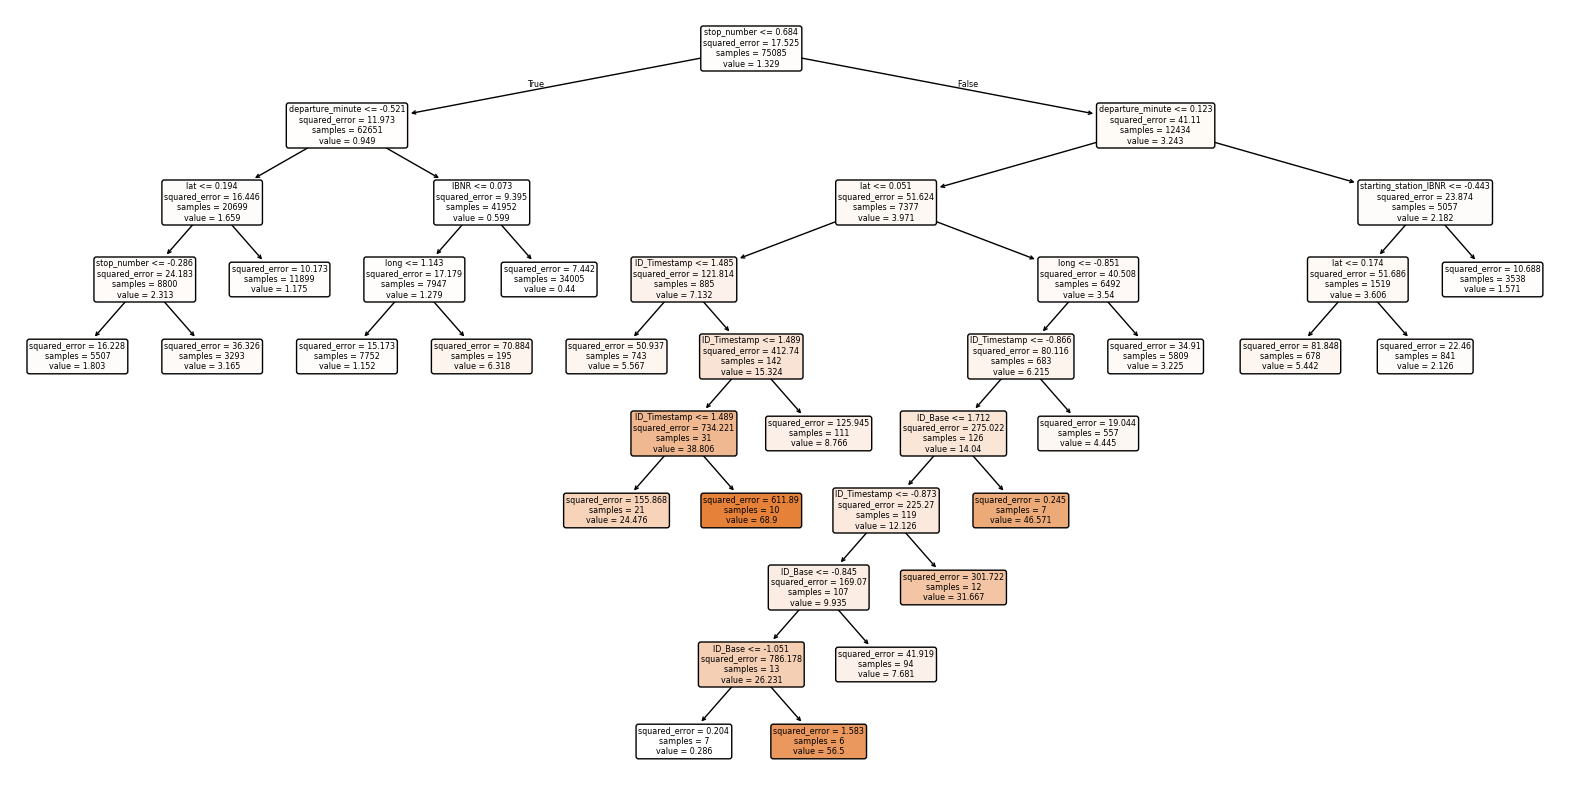

In [14]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming 'regressor' is your trained DecisionTreeRegressor
plt.figure(figsize=(20, 10))  # Adjust size as needed for readability
plot_tree(regression_tree, feature_names=cleaned_features_train.columns, filled=True, rounded=True)
plt.show()


In [11]:
 # Access the tree structure
tree = regression_tree.tree_

for i in range(tree.node_count):
    print(f"Node {i}:")
    print(f"  Impurity (MSE) = {tree.impurity[i]}")
    print(f"  Samples = {tree.n_node_samples[i]}")
    print(f"  Value = {tree.value[i]}")


Node 0:
  Impurity (MSE) = 17.52490459963004
  Samples = 75085
  Value = [[1.32914697]]
Node 1:
  Impurity (MSE) = 11.972637197515814
  Samples = 62651
  Value = [[0.94925859]]
Node 2:
  Impurity (MSE) = 16.445543170299672
  Samples = 20699
  Value = [[1.65887241]]
Node 3:
  Impurity (MSE) = 24.182926020144627
  Samples = 8800
  Value = [[2.31284091]]
Node 4:
  Impurity (MSE) = 16.22782368307579
  Samples = 5507
  Value = [[1.80315962]]
Node 5:
  Impurity (MSE) = 135.90999999999997
  Samples = 20
  Value = [[14.3]]
Node 6:
  Impurity (MSE) = 53.10204081632651
  Samples = 7
  Value = [[27.57142857]]
Node 7:
  Impurity (MSE) = 34.59171597633136
  Samples = 13
  Value = [[7.15384615]]
Node 8:
  Impurity (MSE) = 23.9375
  Samples = 8
  Value = [[5.25]]
Node 9:
  Impurity (MSE) = 36.56
  Samples = 5
  Value = [[10.2]]
Node 10:
  Impurity (MSE) = 15.220269697227259
  Samples = 5487
  Value = [[1.75760889]]
Node 11:
  Impurity (MSE) = 27.636975820404196
  Samples = 1308
  Value = [[2.87079511

In [12]:
cleaned_features.describe()

NameError: name 'cleaned_features' is not defined

In [ ]:
print(cleaned_features.describe())
print(cleaned_target.describe())


            ID_Base  ID_Timestamp   stop_number  starting_station_IBNR  \
count  92372.000000  9.237200e+04  92372.000000           9.237200e+04   
mean    2334.743624  2.407109e+09      5.845581           8.012398e+06   
std     1327.437959  2.122525e+04      5.012597           2.565280e+04   
min        0.000000  2.407040e+09      1.000000           8.000014e+06   
25%     1223.000000  2.407092e+09      2.000000           8.000661e+06   
50%     2329.000000  2.407111e+09      4.000000           8.002806e+06   
75%     3484.000000  2.407130e+09      7.000000           8.006714e+06   
max     4677.000000  2.407142e+09     32.000000           8.089474e+06   

               IBNR          long           lat  info_present  \
count  9.237200e+04  92372.000000  92372.000000  92372.000000   
mean   7.950999e+06      8.827858     49.206997      0.298619   
std    6.876468e+05      2.880577      9.857873      0.457655   
min    0.000000e+00      0.000000      0.000000      0.000000   
25%    8

In [ ]:
cleaned_features

,ID_Base,ID_Timestamp,stop_number,starting_station_IBNR,IBNR,long,lat,info_present,last_station_encoded,arrival_year,arrival_month,arrival_day,arrival_hour,arrival_minute,departure_year,departure_month,departure_day,departure_hour,departure_minute
12190,1172,2407130634,2,8000014,8004965.0,9.606100,47.784481,0,834,2024.0,7.0,13.0,6.0,45.0,2024.0,7.0,13.0,6.0,46.0
12192,1172,2407140634,2,8000014,8004965.0,9.606100,47.784481,0,834,2024.0,7.0,14.0,6.0,45.0,2024.0,7.0,14.0,6.0,46.0
12227,684,2407081034,2,8000014,8004965.0,9.606100,47.784481,1,834,2024.0,7.0,8.0,10.0,45.0,2024.0,7.0,8.0,10.0,46.0
12229,684,2407091034,2,8000014,8004965.0,9.606100,47.784481,0,834,2024.0,7.0,9.0,10.0,45.0,2024.0,7.0,9.0,10.0,46.0
12231,684,2407111034,2,8000014,8004965.0,9.606100,47.784481,0,834,2024.0,7.0,11.0,10.0,45.0,2024.0,7.0,11.0,10.0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2792541,2777,2407120110,1,8089131,8089015.0,0.000000,0.000000,0,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2792542,2398,2407120010,1,8089131,8089015.0,0.000000,0.000000,0,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2792545,3123,2407100231,2,8089131,8089116.0,13.344253,52.536250,0,107,2024.0,7.0,10.0,2.0,32.0,2024.0,7.0,10.0,2.0,33.0
2792547,3123,2407110231,2,8089131,8089116.0,13.344253,52.536250,0,107,2024.0,7.0,11.0,2.0,32.0,2024.0,7.0,11.0,2.0,33.0
